## Lab | Basic Data Cleaning and EDA


#### Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is and claim amounts. You will help the senior management with some business questions that should help them to better understand their customers, improve their services and improve profitability.

#### Some business Objectives for the case study could be:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.



#### 1. Import the necessary libraries

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass 

from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split      
from sklearn.linear_model import LogisticRegression  

#### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv(""))


In [2]:
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv", sep=",")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### 3. First, look at its main features (head, shape, info).

In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### 4. Rename the columns so they follow the PE8 (snake case)


In [6]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
# Standardize header names

data_cols=customer_df.columns
cols = [col_name.lower().replace(' ', '_') for col_name in data_cols]
cols
customer_df.columns=cols 

In [8]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
#Changing "employmentstatus" column to "employment_status"

customer_df.rename(columns={"employmentstatus": "employment_status"}, inplace=True)

#### 5. Fix the data types of any other column/columns as you might see necessary. 

Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.


In [10]:
#change effective_to_date column to datetime so we can extract year later if necessary.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [11]:
#change ""number_of_open_complaints" and "number_of_policies" from int to string to be used as categorical.

customer_df[['number_of_open_complaints', 'number_of_policies']] = customer_df[['number_of_open_complaints', 'number_of_policies']].astype(str)

#### 6.Plot a correlation matrix, and comment on what you observe.


In [12]:
#Extract numerical variables
numerical = customer_df.select_dtypes(include = np.number)
numerical.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


In [13]:
#Creating a Correlation plot:

correlations_matrix = numerical.corr(method="spearman")
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
customer_lifetime_value,1.000000,0.055395,0.453933,0.005126,-0.002429,0.210598
income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,-0.401598
monthly_premium_auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,0.522261
months_since_last_claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,-0.000782
months_since_policy_inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.006569
total_claim_amount,0.210598,-0.401598,0.522261,-0.000782,-0.006569,1.000000


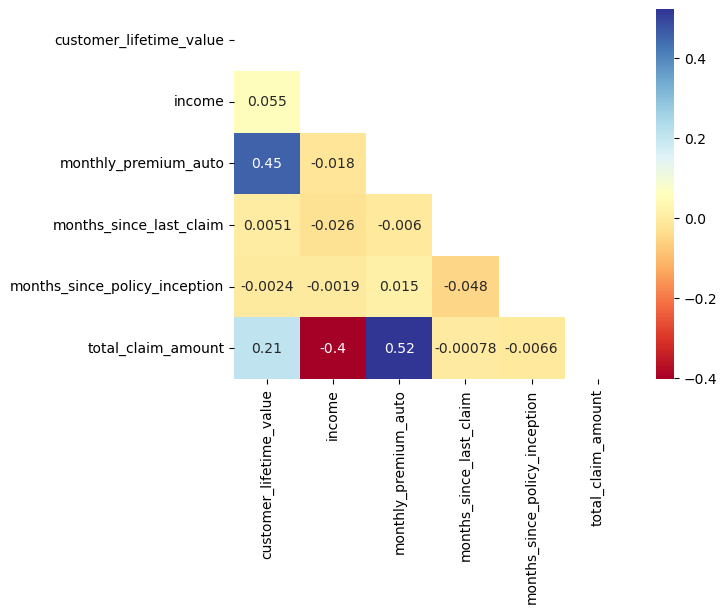

In [16]:
mask = np.zeros_like(correlations_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlations_matrix, annot=True, mask=mask,cmap='RdYlBu')
plt.show()

The highest correlation is 0.52 between "monthly_premium_auto" and "total_claim_amount".

Also there is a high correlation of 0.45 (between "customer_lifetime_value" and "monthly_premium_auto").


#### 7.Plot every continuous variable. Comment what you can see in the plots.


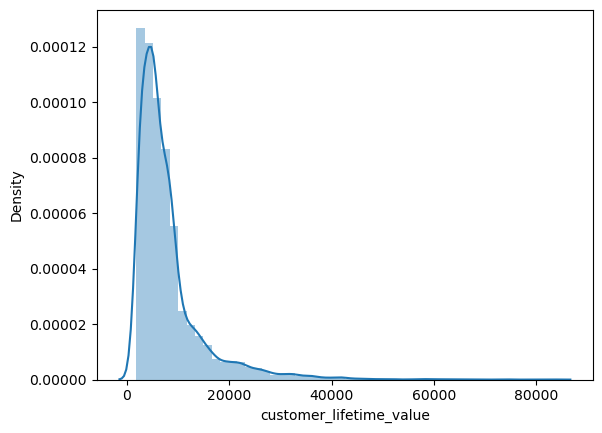

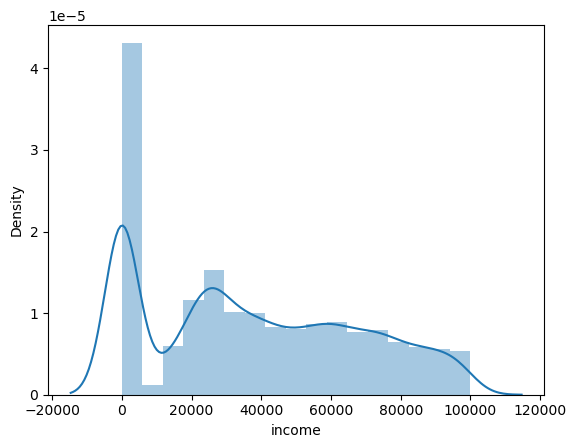

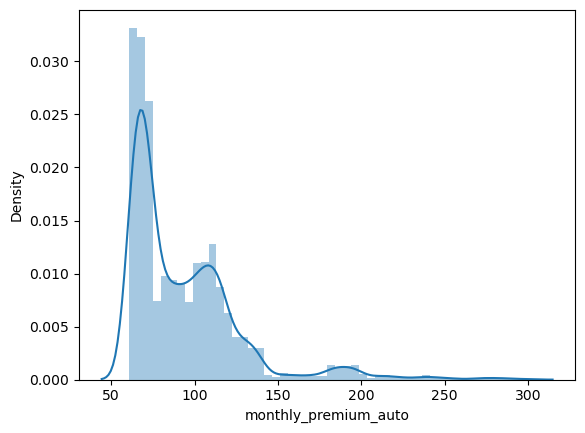

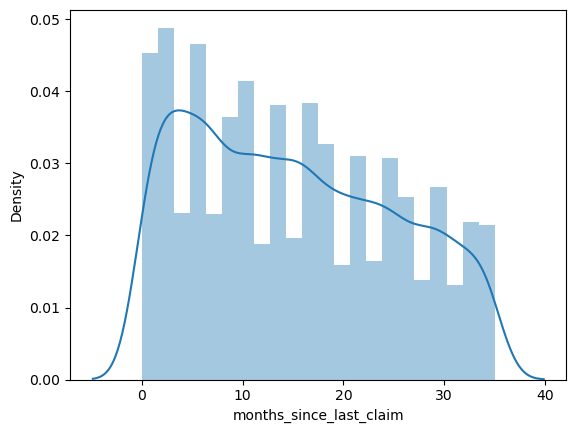

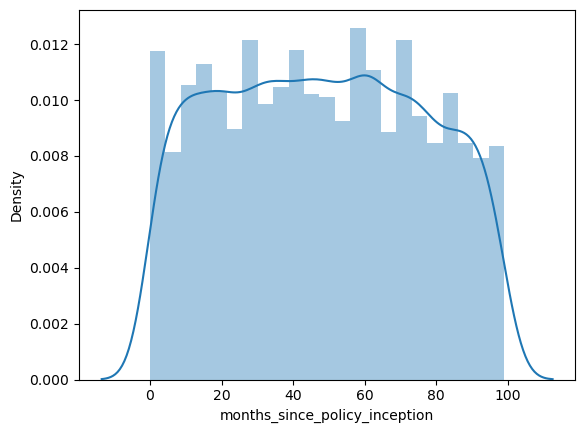

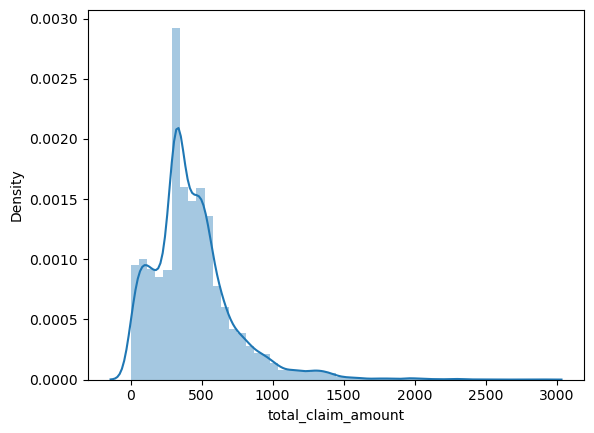

In [17]:
#Plotting distribution of numerical variables

for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

Only "costumer_lifetime_value" follows distribution which skewed to the right.
All the others are neither symmetric or normal distributed.

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

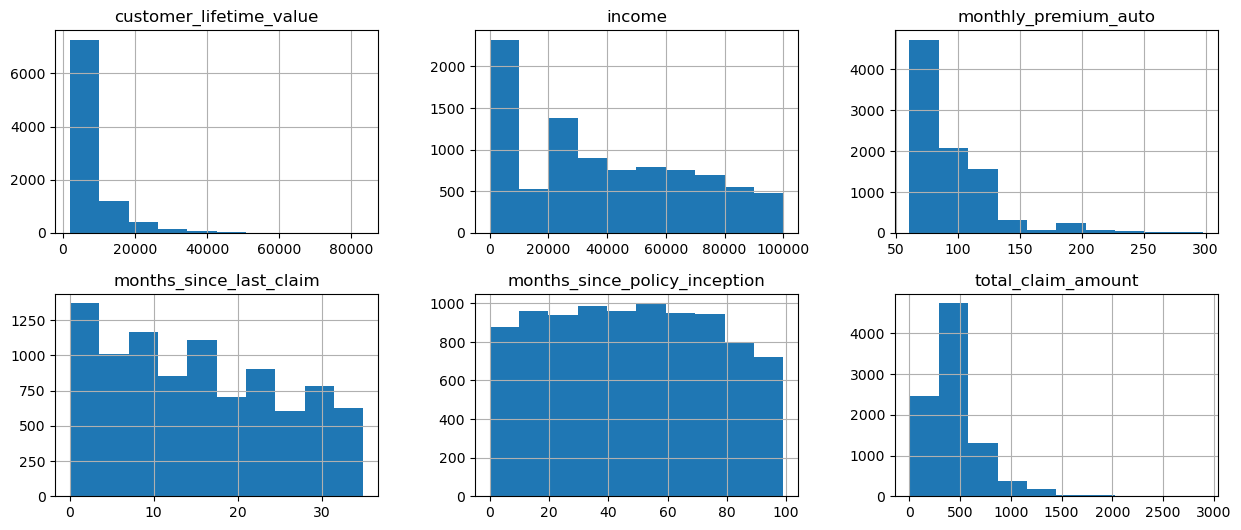

In [18]:
#plotting an histogram to analyse numerical columns distribution

numerical.hist(figsize=(15,30),layout=(9,3))

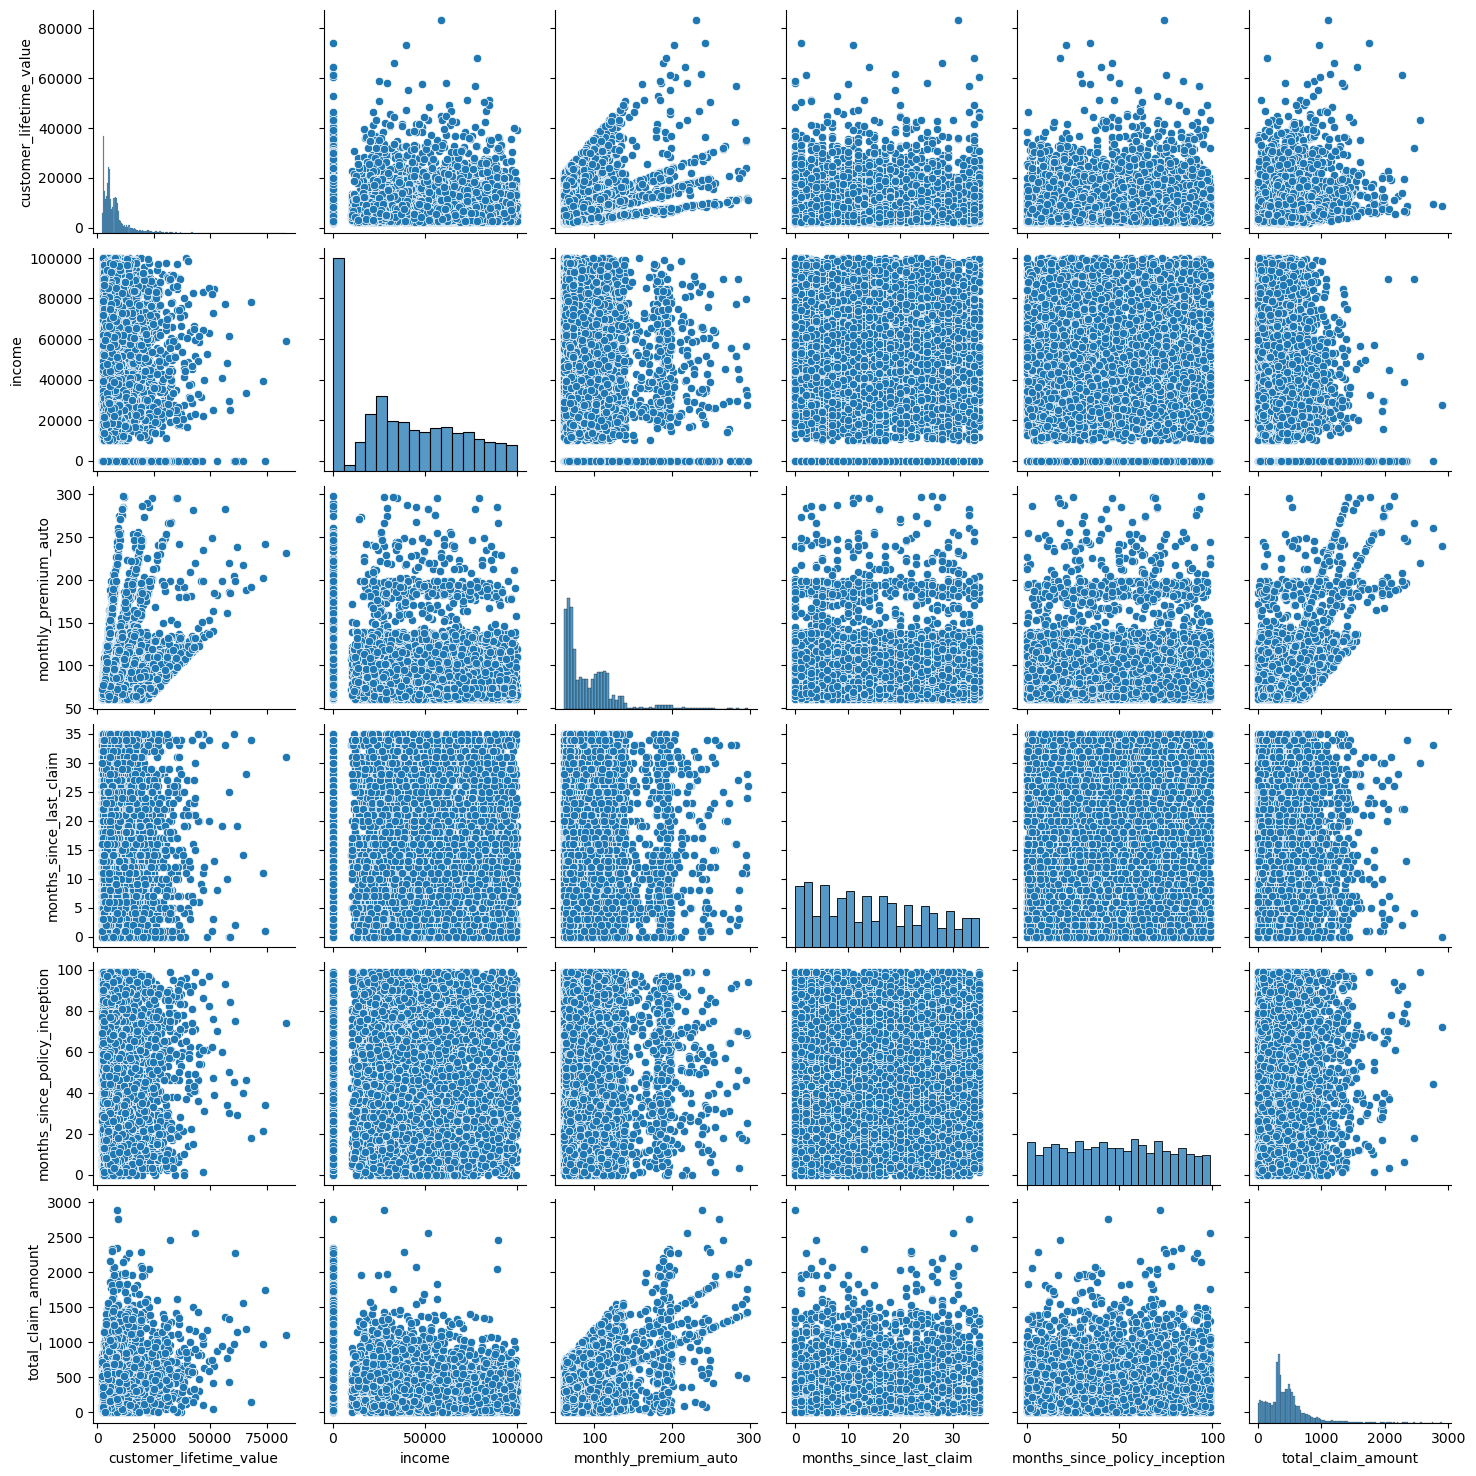

In [19]:
#Let's analyse relationship between numerical variables:

sns.pairplot(numerical)

#### 8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!).

Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.

In [21]:
#Extract categorical variables

categorical = customer_df.select_dtypes(include = np.object)
categorical=categorical.drop(["customer"], axis=1)

#dropping "customer" column because any ID variable is unique, I could also set the "customer" column as an index instead of dropping.

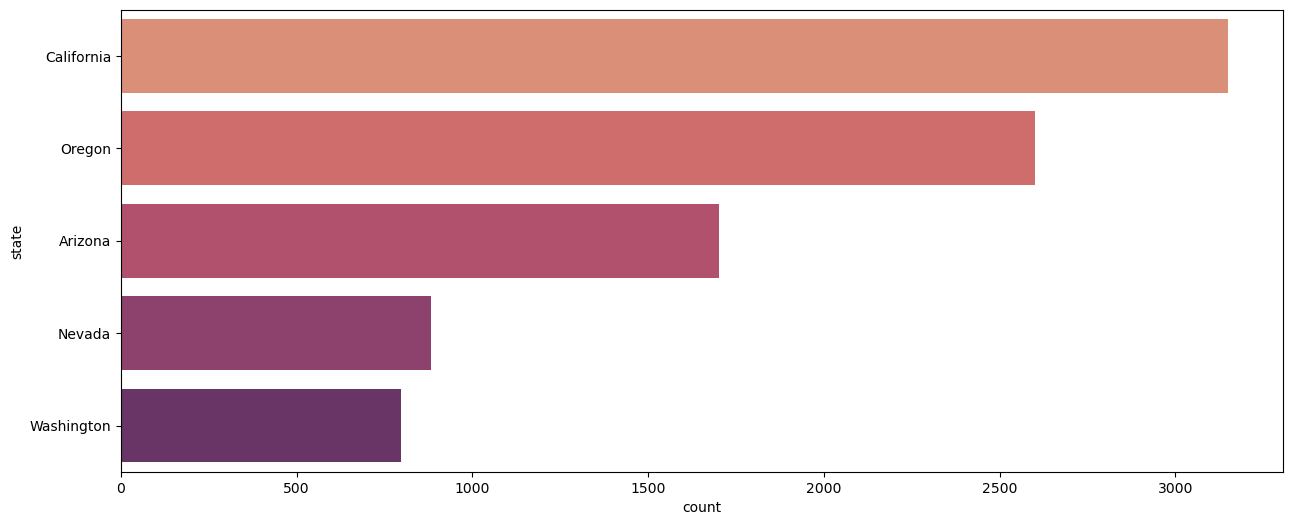

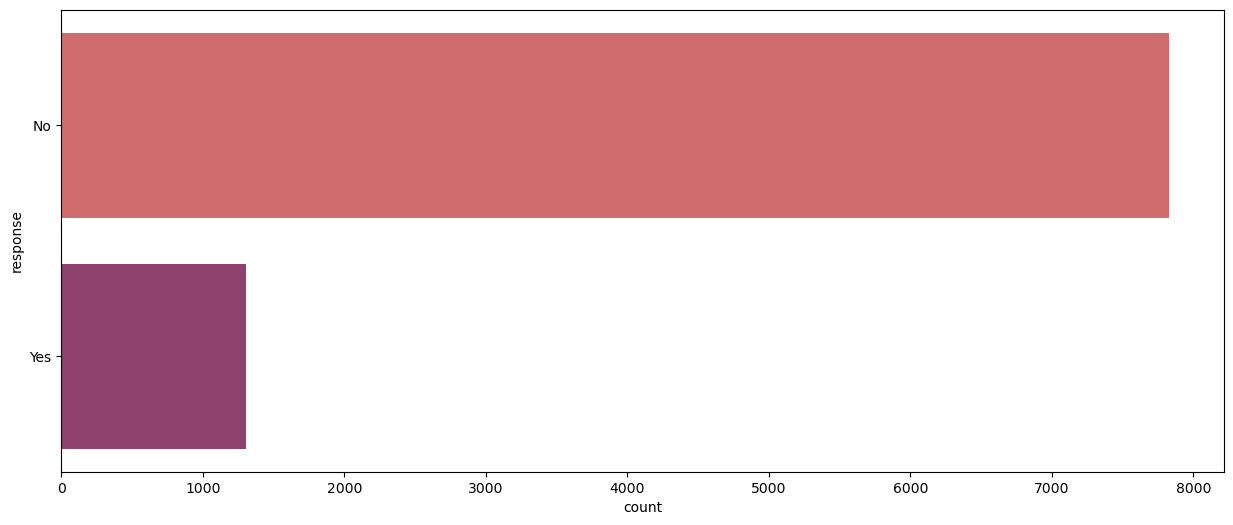

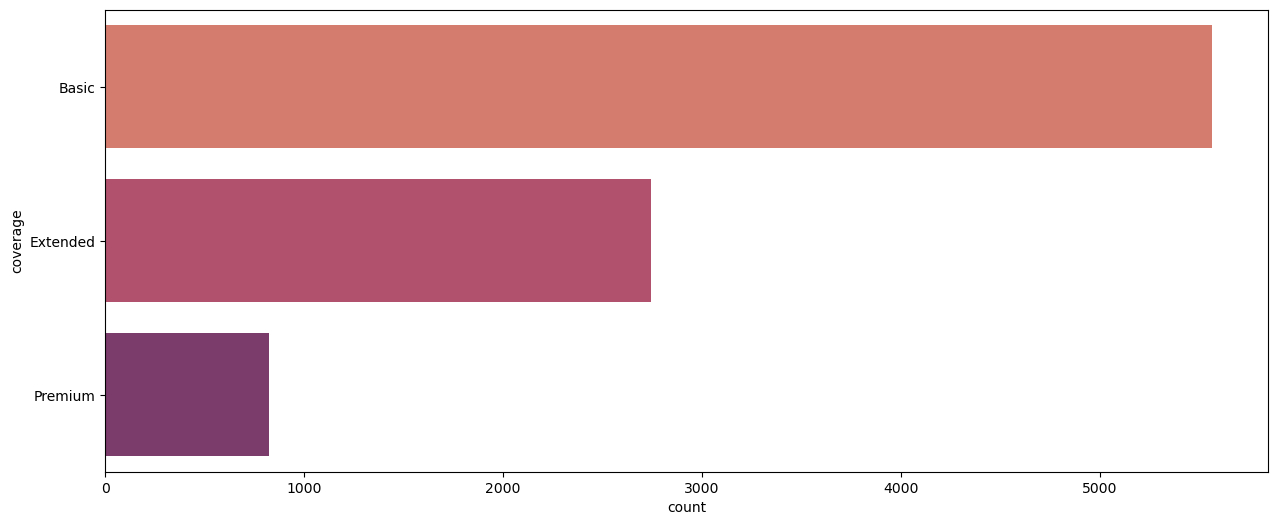

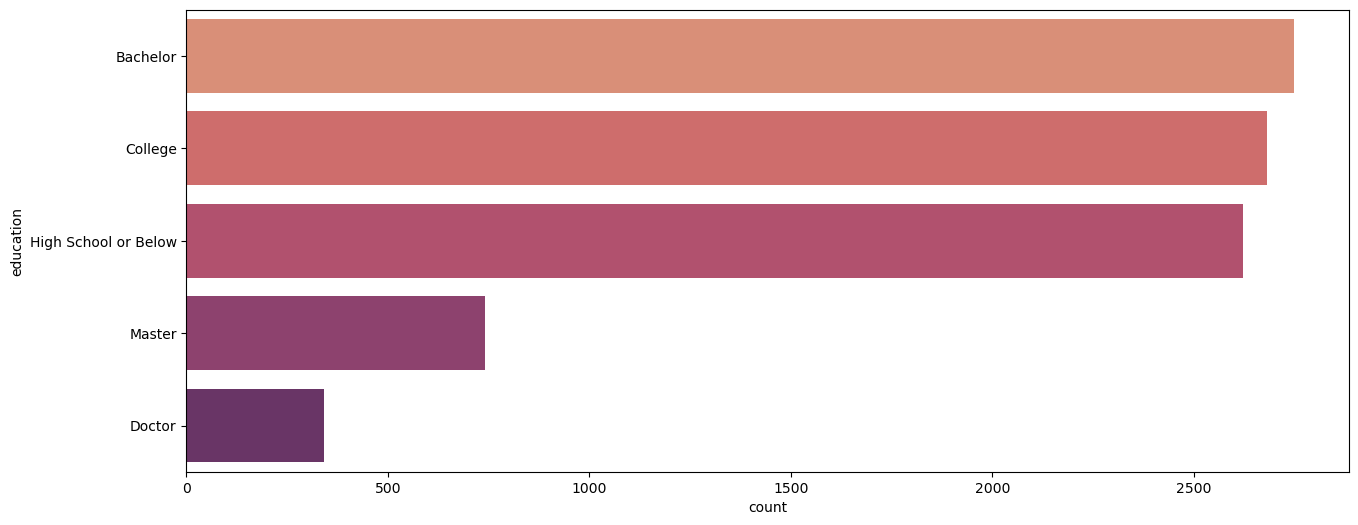

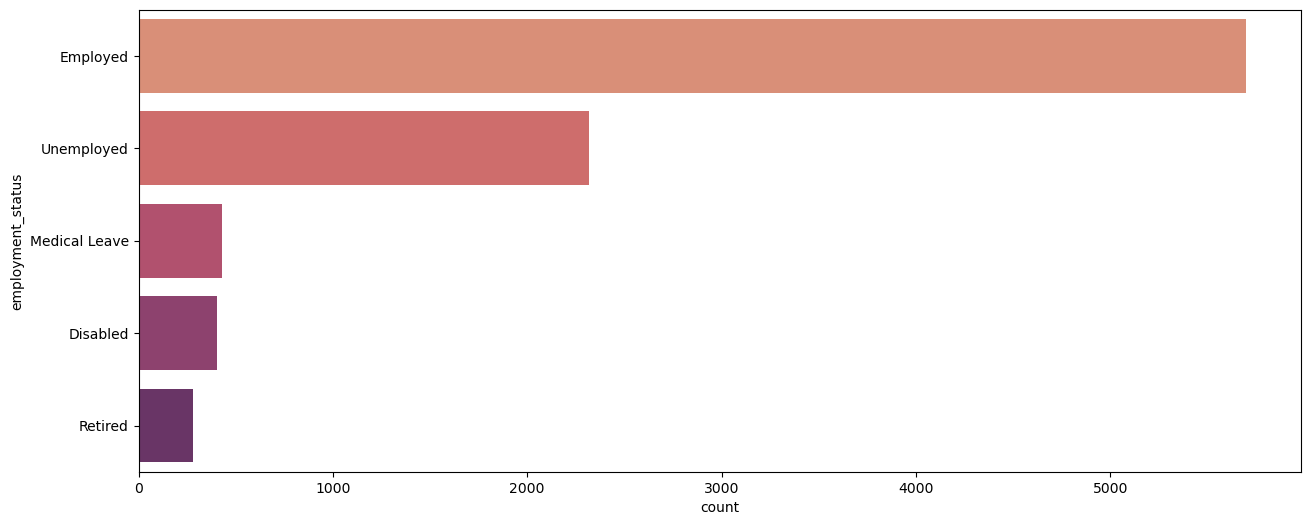

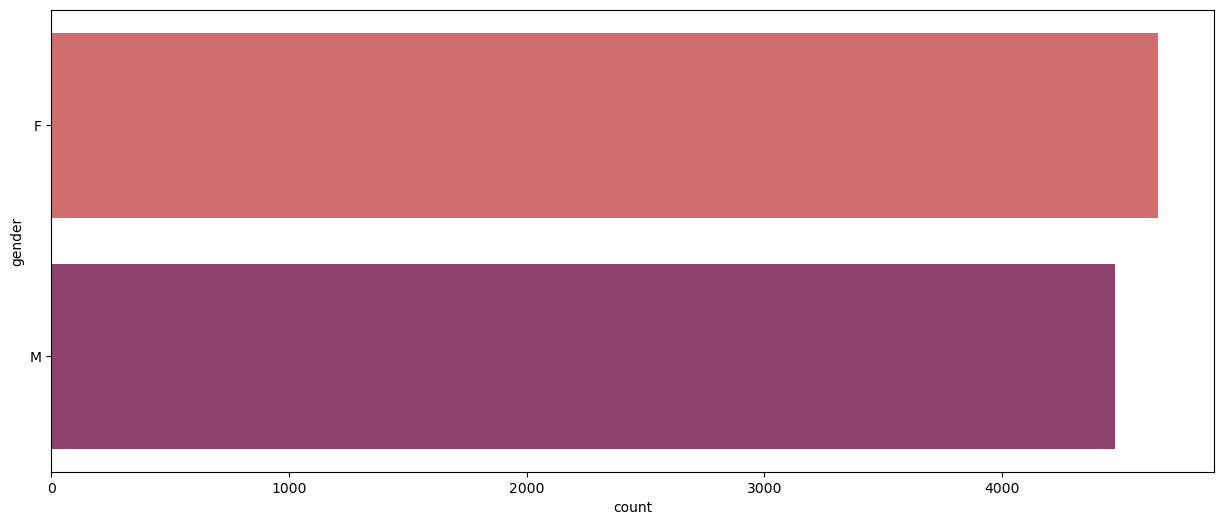

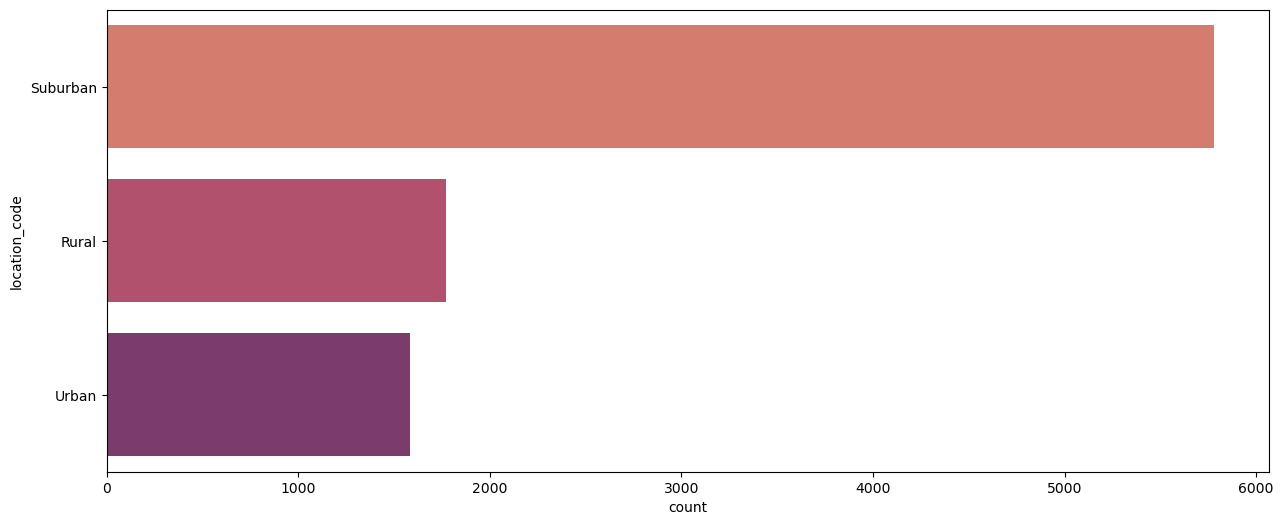

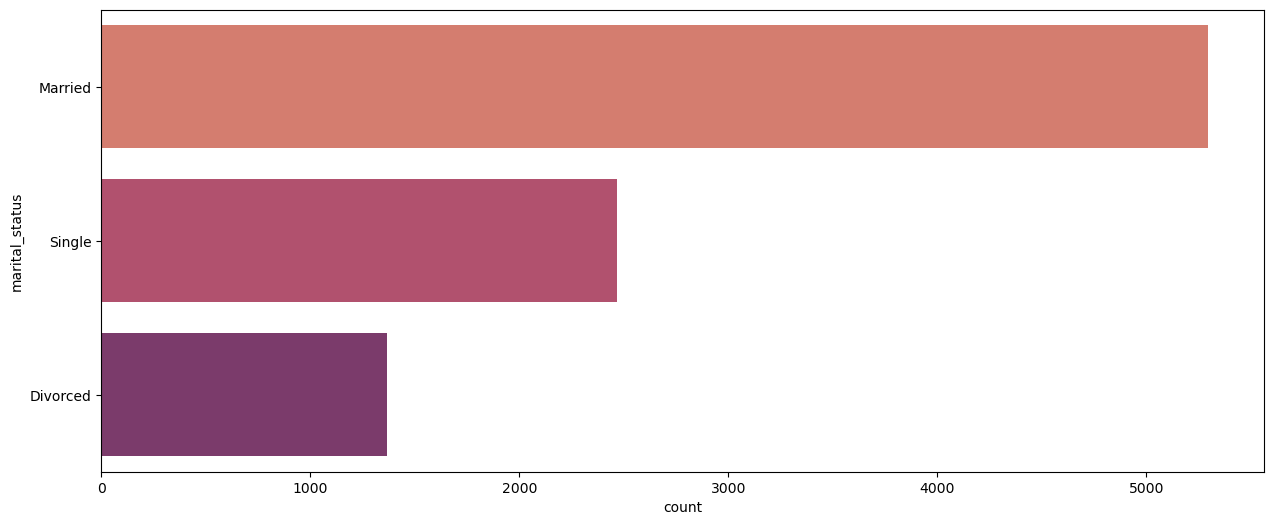

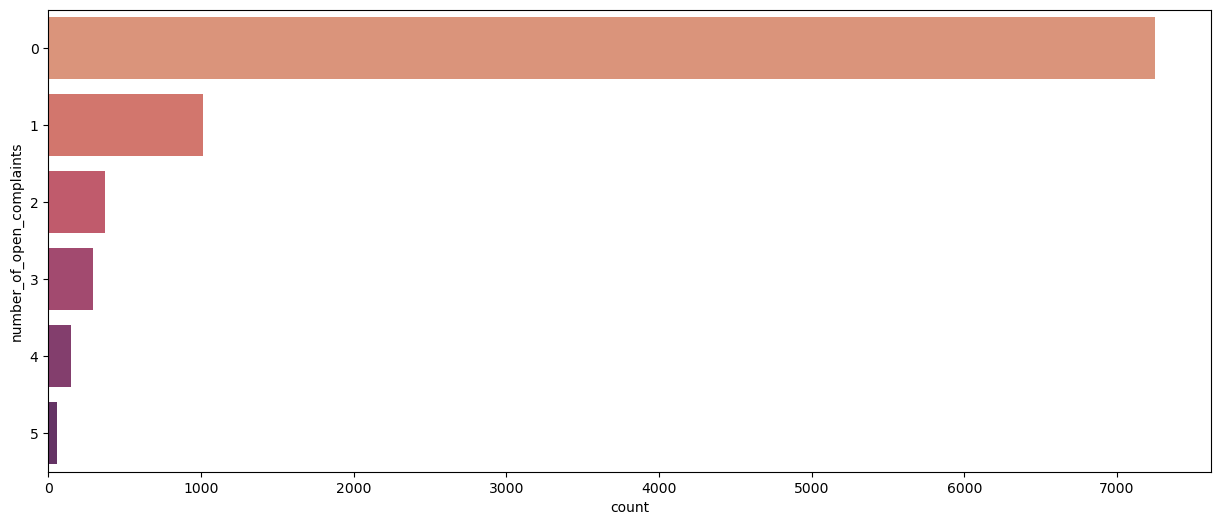

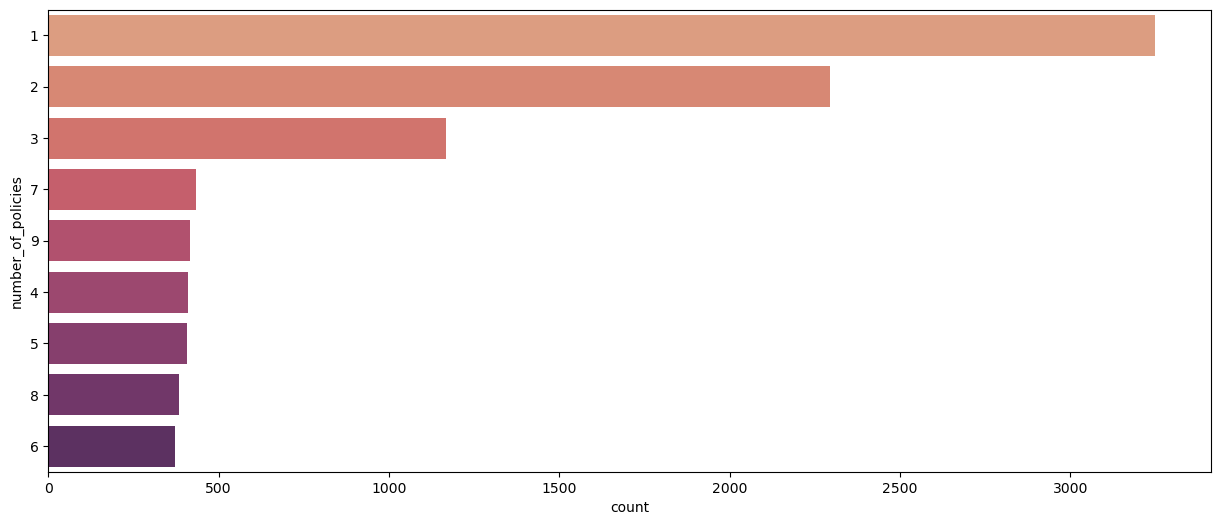

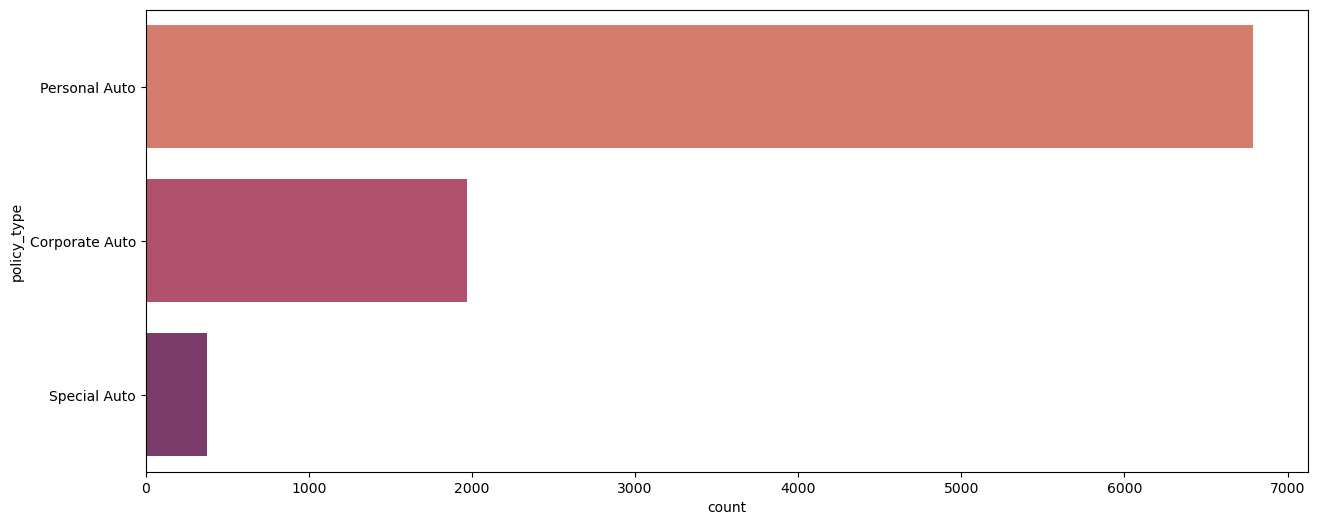

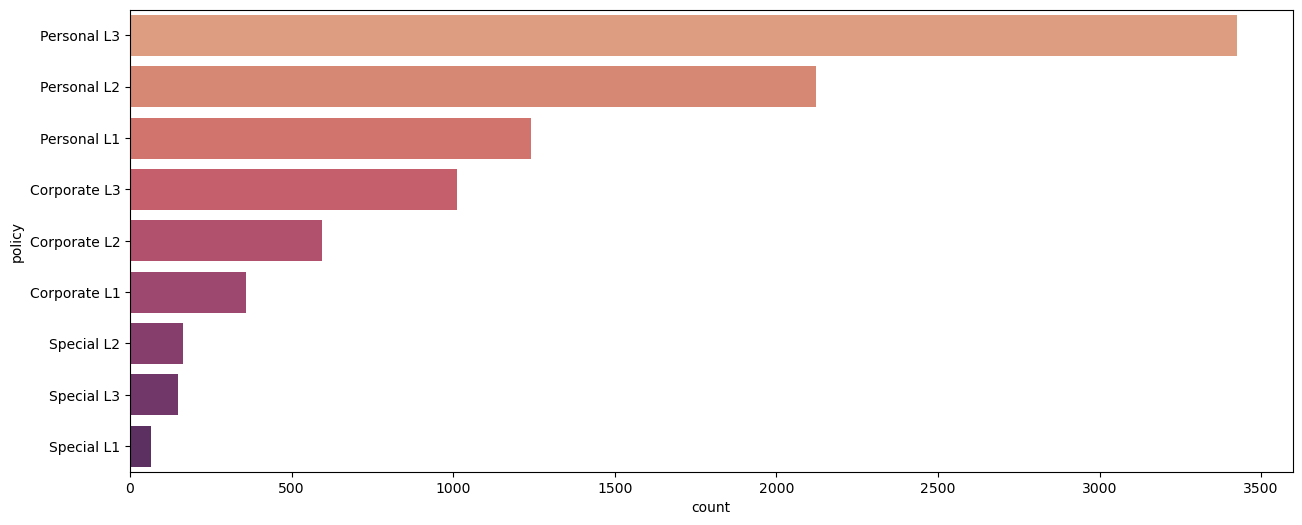

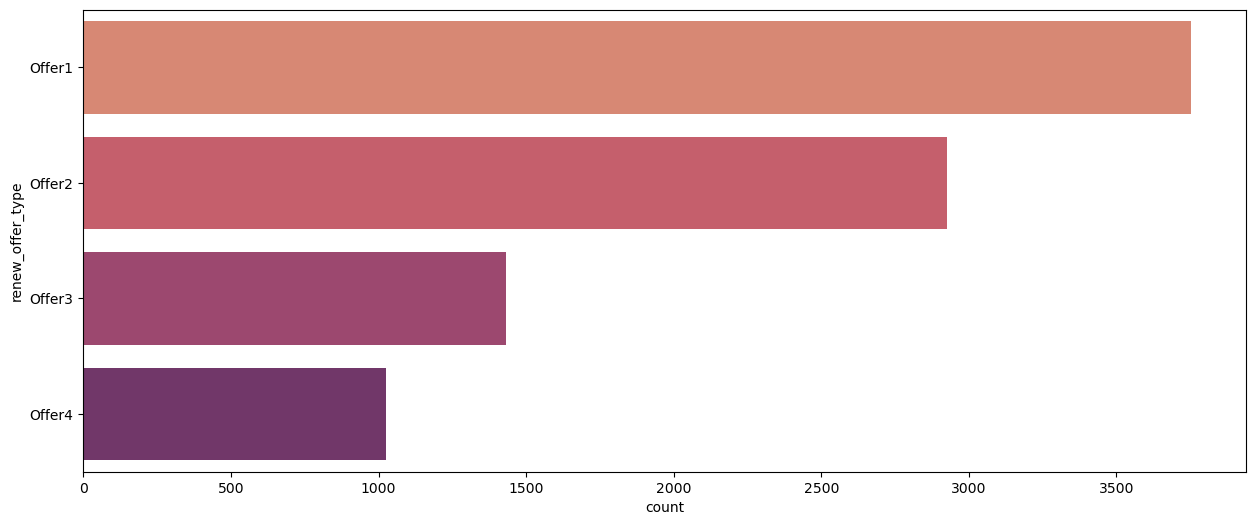

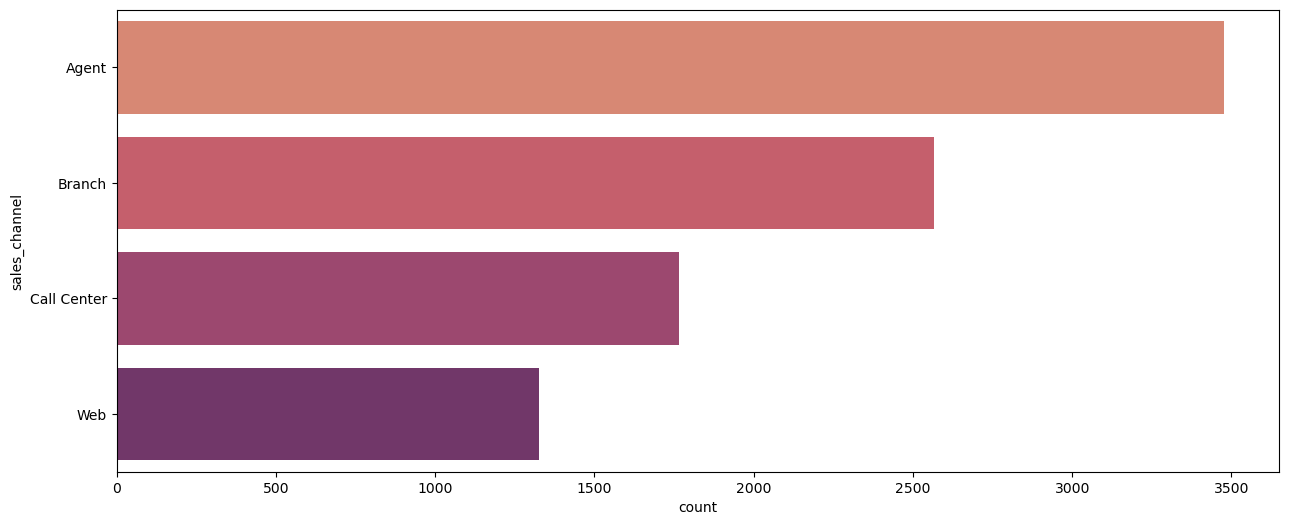

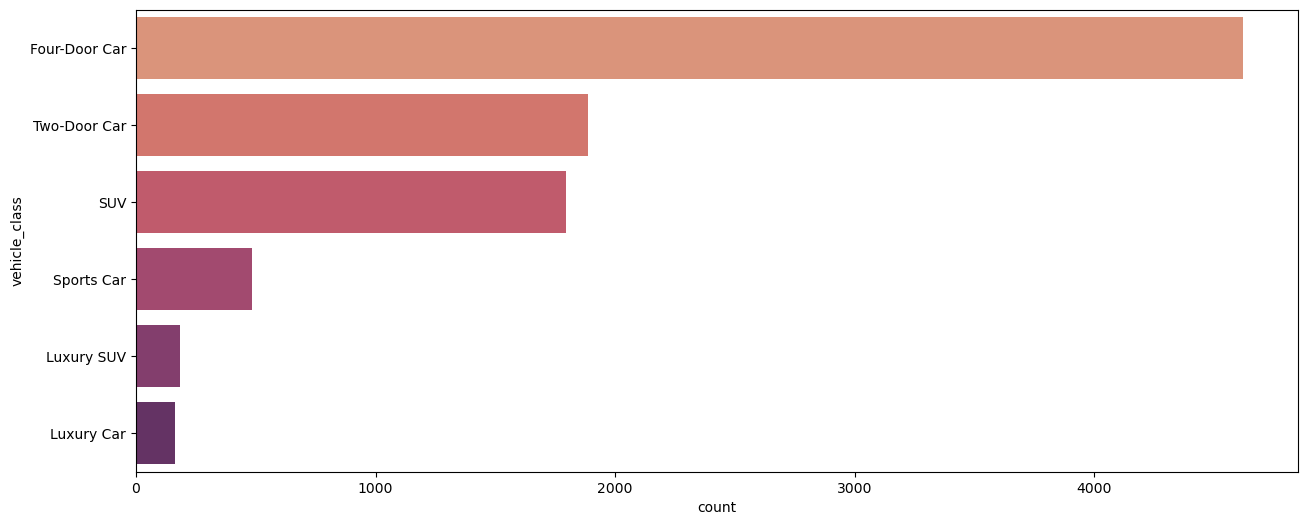

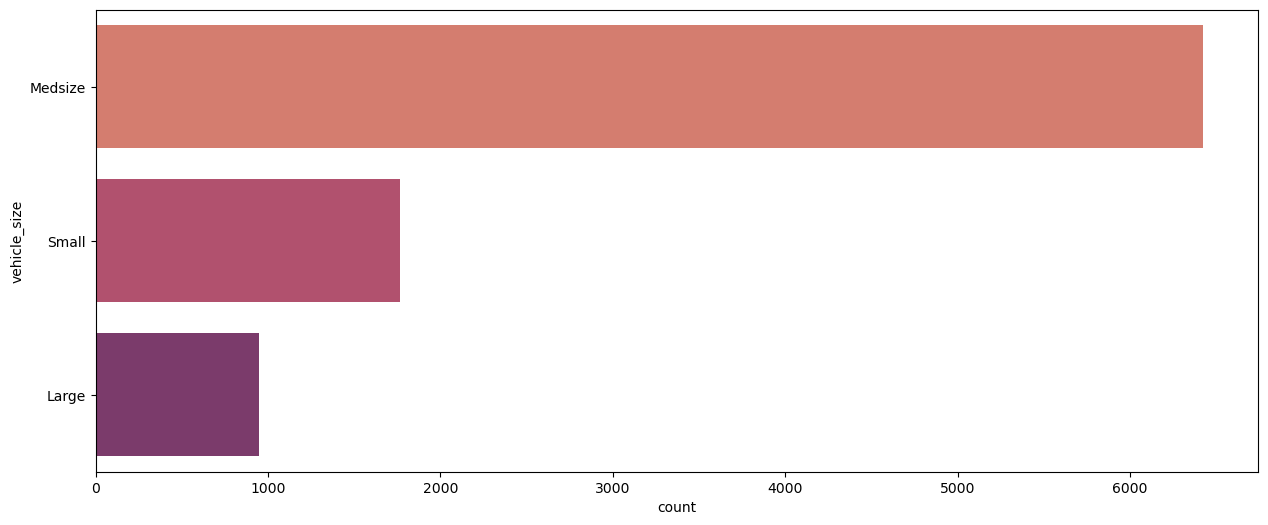

In [22]:
#Let's visualize each categorical variable separately.

columns=categorical.columns

for i in columns:
    fig, ax=plt.subplots(1,1, figsize=(15,6))  #creates a fig
    sns.countplot(y=categorical[i][1:],data=categorical.iloc[1:], order=categorical[i][1:].value_counts().index, palette='flare')

    
#source: https://www.kaggle.com/code/patrickgomes/how-to-plot-multiple-graphs-using-for-loop-easy/notebook

In [ ]:
# Now let's visualize relationship between categorical variables

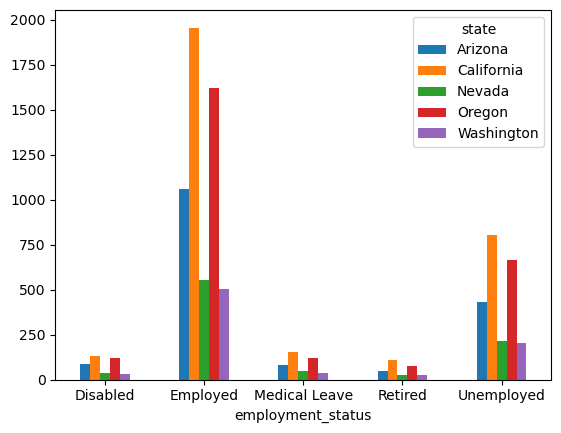

In [25]:
crosstab = pd.crosstab(categorical.employment_status, categorical.state)
barplot = crosstab.plot.bar(rot=0)

#we an see state of California and Oregon are predominant in all groups of employed and non employed.

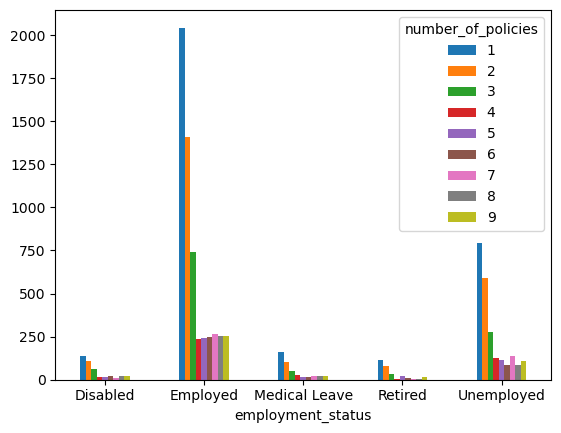

In [27]:
crosstab = pd.crosstab(categorical.employment_status, categorical.number_of_policies)
barplot = crosstab.plot.bar(rot=0)

#we can see that the employed group is the predominant group when it comes to number of policies.

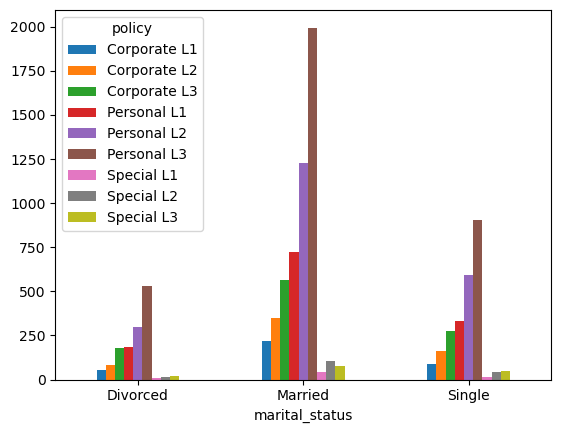

In [30]:
crosstab = pd.crosstab(categorical.marital_status, categorical.policy)
barplot = crosstab.plot.bar(rot=0)

# Policy "Personal L3" is the most common among all all groups of marital status.

#### 9.Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'customer_lifetime_value'),
  Text(1, 0, 'income'),
  Text(2, 0, 'monthly_premium_auto'),
  Text(3, 0, 'months_since_last_claim'),
  Text(4, 0, 'months_since_policy_inception'),
  Text(5, 0, 'total_claim_amount')])

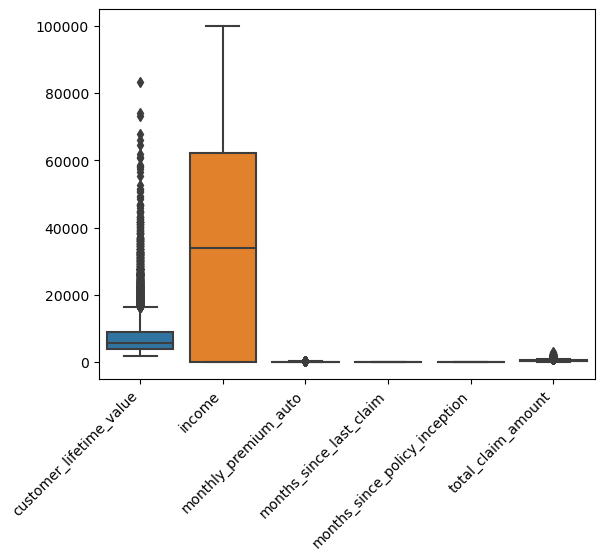

In [33]:
#checking outliers with boxplot

sns.boxplot(data=numerical)
plt.xticks(rotation=45, ha='right')

We can see the presence of outliers in customer_lifetime_value and total_claim_amount.

In [34]:
numerical.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


Here we can see there is a large difference at 75th percentile and max in "customer_lifetime_value" and "total_claim_amount", suggesting and confirming the presence of extreme values (Outliers) in our data.

If I apply Box Cox to transform the data into a more normal distribution, some outliers might be removed.
If after applying boxcox, outliers are still there I would remove them but only after my feature selection for the model, so I won't end up removing rows unnecessarily. 

<AxesSubplot:xlabel='customer_lifetime_value'>

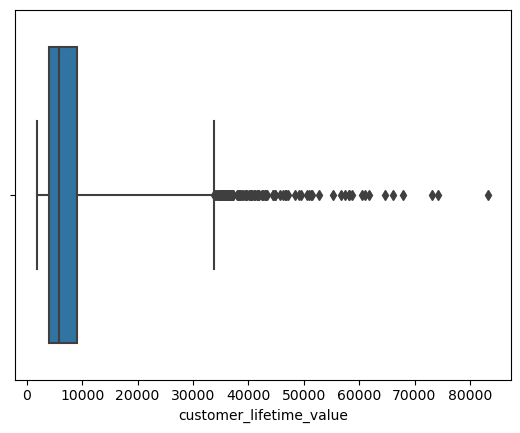

In [35]:
# Let's have a closer look at the outliers in "customer_life_time_value" and total_claim_amount column.

sns.boxplot(numerical["customer_lifetime_value"], whis=5)

<AxesSubplot:xlabel='total_claim_amount'>

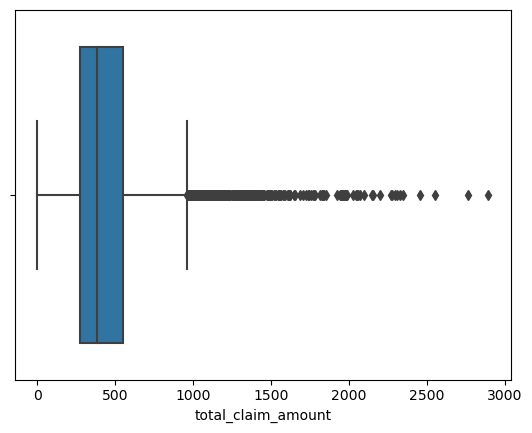

In [36]:
sns.boxplot(numerical["total_claim_amount"])


##### Removing outliers of "customer_lifetime_value" column to practice!

In [37]:
# Finding IQR

iqr = np.percentile(numerical["customer_lifetime_value"],75) - np.percentile(numerical["customer_lifetime_value"],25)
iqr

4967.915247000001

In [38]:
# Define the limits. Finding upper and lower limits

upper_limit = np.percentile(numerical["customer_lifetime_value"],75) + 1.5*iqr    
lower_limit = np.percentile(numerical["customer_lifetime_value"],25) - 1.5*iqr
upper_limit, lower_limit

(16414.039911750002, -3457.6210762500014)

In [39]:
# Find the outliers and remove them from the data

numerical_outliers= numerical[(numerical["customer_lifetime_value"]>lower_limit) & (numerical['customer_lifetime_value']<upper_limit)]

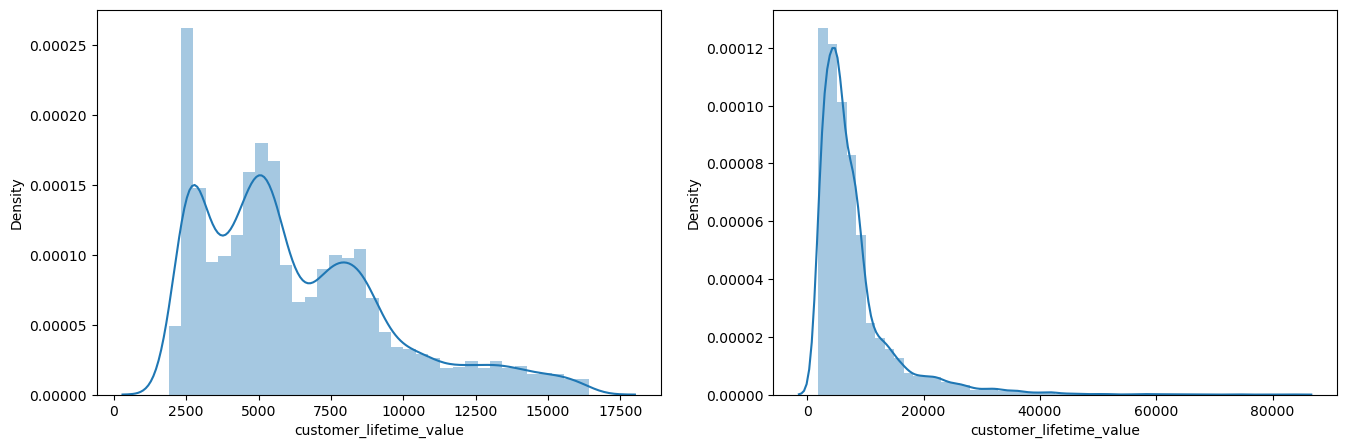

In [40]:
#let's compare distribution

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(numerical_outliers['customer_lifetime_value'])
plt.subplot(1,2,2)
sns.distplot(numerical['customer_lifetime_value'])
plt.show()

#### 10.Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [41]:
# Get the proportion of nulls in the datset.

nulls = pd.DataFrame(round(100*customer_df.isna().sum()/len(customer_df)))   #take the nulls, we sum them, and then divide to get the proportion
nulls.columns = ["nulls_prop"]
nulls = nulls.rename_axis("columns").reset_index()
nulls

,columns,nulls_prop
0,customer,0.0
1,state,0.0
2,customer_lifetime_value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective_to_date,0.0
7,employment_status,0.0
8,gender,0.0
9,income,0.0


No nulls found in dataset. However, if null values were found, I would first see what is our target / what we predicting and check the correlation of the features with our target, because if columns are high correlated with target and if a lot of nulls were present in those columns, I would not remove them. I would replace them with Median/Mean/Mode if data was normally distributed, or using Interpolation(Linear or Polynomial) or using linear regression.